        wmc  dit       noc       cbo       rfc      lcom        ca        ce  \
0  0.045802  0.4  0.057692  0.000000  0.033670  0.000000  0.000000  0.000000   
1  0.480916  0.2  0.057692  0.450000  0.757576  0.110832  0.122807  0.363636   
2  0.007634  0.8  0.000000  0.016667  0.006734  0.000000  0.017544  0.000000   
3  0.160305  0.6  0.000000  0.033333  0.084175  0.029350  0.000000  0.036364   
4  0.190840  0.4  0.057692  0.216667  0.225589  0.004752  0.052632  0.200000   

        npm     lcom3  ...       dam       moa       mfa       cam    ic  \
0  0.072289  0.000000  ...  1.000000  0.000000  0.850000  0.555556  0.25   
1  0.506024  0.436040  ...  0.896552  0.146341  0.678947  0.152074  0.50   
2  0.012048  1.000000  ...  0.000000  0.000000  1.000000  1.000000  0.00   
3  0.253012  1.000000  ...  0.000000  0.000000  0.824561  0.523810  0.00   
4  0.168675  0.319444  ...  0.833333  0.073171  0.684932  0.205000  0.50   

    cbm       amc    max_cc    avg_cc  bug  
0  0.08  0.010045

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Instructions for updating:
Use tf.cast instead.
Train on 919 samples, validate on 395 samples
Epoch 1/5
919/919 [==============================] - 3s 3ms/step - loss: 4.1257 - accuracy: 0.3112 - mse: 7.2467 - mae: 1.0504 - mape: 9724204.0000 - cosine: 3.0745 - val_loss: 4.0886 - val_accuracy: 0.5899 - val_mse: 21.0297 - val_mae: 1.6256 - val_mape: 9363111.0000 - val_cosine: 3.2547
Epoch 2/5
919/919 [==============================] - 0s 129us/step - loss: 4.0514 - accuracy: 0.6126 - mse: 7.2467 - mae: 1.0504 - mape: 9724205.0000 - cosine: 3.0733 - val_loss: 3.9725 - val_accuracy: 0.5899 - val_mse: 21.0297 - val_mae: 1.6256 - val_mape: 9363111.0000 - val_cosine: 3.2504
Epoch 3/5
919/919 [==============================] - 0s 117us/step - loss: 3.8831 - accuracy: 0.6126 - mse: 7.2467 - mae: 1.0504 - mape: 9724204.0000 - cosine: 3.0635 - val_loss: 3.6708 - val_accuracy: 0.5899 - val_mse: 21.0298 - val_mae: 1.6256 - val_mape: 9363111.0000 - val_cosine: 3.2091
Epoch 4/5
919/919 [=============

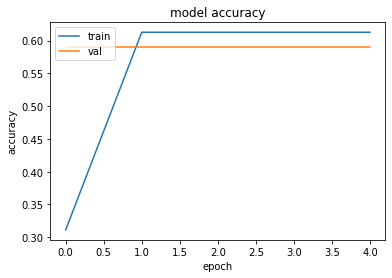

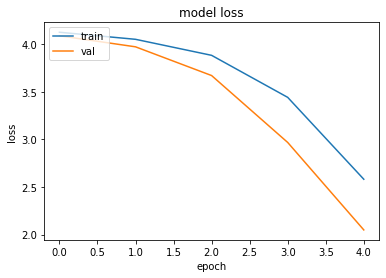

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
import sklearn
from imblearn.over_sampling import RandomOverSampler
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
#from attention_decodernew import AttentionDecoder
#from time_distributed import time_distributed_densenew2
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('xercesversion.csv')
# configure problem
n_features = 20
n_timesteps_in = 5
n_timesteps_out = 5
n_repeats = 10
#data = shuffle(data)
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

# define the encoder-decoder with attention model
def attention_model(n_timesteps_in, n_features):
	model = Sequential()
	model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
	model.add(AttentionDecoder(150, n_features))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
	return model

scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(100, input_shape = (1,20), dropout = 0.2, return_sequences=True))
model.add(LSTM(75, dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
#model.add(LSTM(25, dropout = 0.2, return_sequences=True))
#model.add(AttentionDecoder(60, n_features))
model.add(LSTM(50, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(32, activation = 'softmax'))
#train_x = train_x.shape
#train_x = np.reshape(train_x,(train_x.shape[0], 1, train_x.shape[1]))
#train_x.reshape
#model.add(AttentionDecoder(150, n_features))
model.add(Dense(63, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 5, batch_size = 128)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
#for key in history.history.keys():
 #   print(key)
print(history.history.keys())
#accuracy = history_dict['acc']
#val_accuracy = history_dict['val_acc']
#loss = history_dict['loss']
#val_loss = history_dict['val_loss']
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()